In [67]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import glob

In [68]:
drowsy = []
non_drowsy = []

for image in glob.glob("E:\\WEB DOWNLOADS\\DDD\\Driver Drowsiness Dataset (DDD)\\Drowsy\*.png"):
    img = Image.open(image)
    img = img.resize((50, 50))
    img = ImageOps.grayscale(img)
    drowsy.append(np.array(img))
for image in glob.glob("E:\\WEB DOWNLOADS\\DDD\\Driver Drowsiness Dataset (DDD)\\Non Drowsy\\*.png"):
    img = Image.open(image)
    img = img.resize((50, 50))
    img = ImageOps.grayscale(img)
    non_drowsy.append(np.array(img))
drowsy = np.array(drowsy)
non_drowsy = np.array(non_drowsy)

In [69]:
label = []

for i in range(22348):
    label.append(0)
for i in range(19445):
    label.append(1)
label = np.array(label)
label = label.reshape(-1, 1)

In [70]:
X = np.concatenate((drowsy, non_drowsy), axis = 0)
X = X / 255
y = label

In [71]:
X[0].shape

(50, 50)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [73]:
from tensorflow import keras

In [74]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape = (50, 50, 1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [75]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [76]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1045/1045 [==============================] - 38s 35ms/step - loss: 0.2062 - accuracy: 0.9029
Epoch 2/10
1045/1045 [==============================] - 39s 38ms/step - loss: 0.0297 - accuracy: 0.9932
Epoch 3/10
1045/1045 [==============================] - 38s 36ms/step - loss: 0.0201 - accuracy: 0.9961
Epoch 4/10
1045/1045 [==============================] - 38s 36ms/step - loss: 0.0138 - accuracy: 0.9978
Epoch 5/10
1045/1045 [==============================] - 37s 36ms/step - loss: 0.0104 - accuracy: 0.9984
Epoch 6/10
1045/1045 [==============================] - 39s 37ms/step - loss: 0.0094 - accuracy: 0.9984
Epoch 7/10
1045/1045 [==============================] - 39s 37ms/step - loss: 0.0080 - accuracy: 0.9983
Epoch 8/10
1045/1045 [==============================] - 38s 36ms/step - loss: 0.0065 - accuracy: 0.9988
Epoch 9/10
1045/1045 [==============================] - 38s 36ms/step - loss: 0.0042 - accuracy: 0.9991
Epoch 10/10
1045/1045 [==============================] - 38s 37m

In [77]:
import matplotlib.pyplot as plt

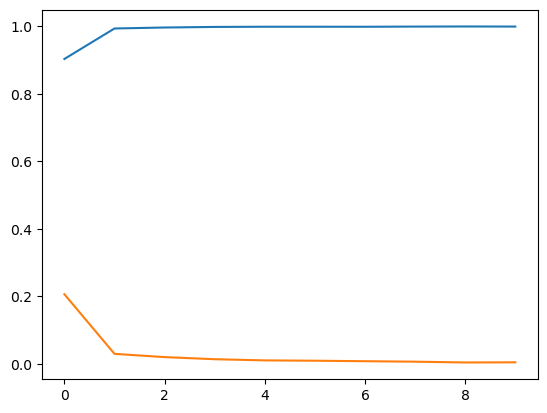

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

In [110]:
y_pred = np.array([int(x) for x in np.around(model.predict(X_test))])
y_test = y_test.reshape(1, -1)[0]

262/262 [==============================] - 2s 7ms/step


In [112]:
den = len(y_pred)
num = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        num += 1
score = num/den
score

0.9991625792558918

In [115]:
model.save("E:\\VS Code Programs\\Python_Codes\\OpenCV\\model")

INFO:tensorflow:Assets written to: E:\VS Code Programs\Python_Codes\OpenCV\model\assets


INFO:tensorflow:Assets written to: E:\VS Code Programs\Python_Codes\OpenCV\model\assets
